 # Multithreading in Python

from: https://www.geeksforgeeks.org/multithreading-python-set-1/
#### Process
- process is an instance of a computer program that is being executed.
- Any process has 3 basic components:-
 - executable program
 - data needed by the program
 - execution context of the program


#### Thread
- a thread is a sequence of such instructions within a program that can be executed independently of other code
- thread is simply a subset of a process
- A thread contains all this information in a **Thread Control Block (TCB)**:
<br>
- **Thread Identifier**: Unique id (TID) is assigned to every new thread
- **Stack pointer**: Points to thread’s stack in the process. Stack contains the local variables under thread’s scope.
- **Program counter**: a register which stores the address of the instruction currently being executed by thread.
- **Thread state**: can be running, ready, waiting, start or done.
- **Thread’s register set**: registers assigned to thread for computations.
- **Parent process Pointer**: A pointer to the Process control block (PCB) of the process that the thread lives on.
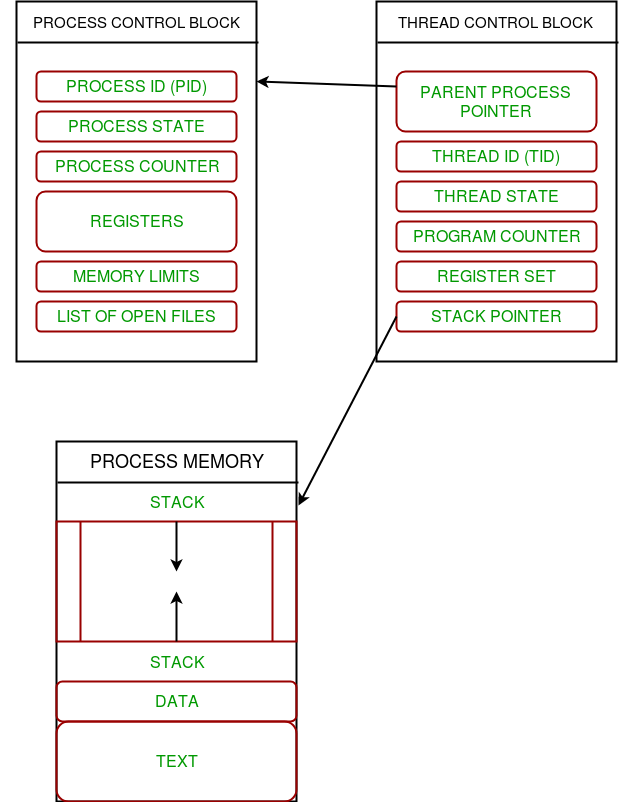


#### Multi-threading:
Multiple threads can exist within one process where:
- Each thread contains its own register set and local variables (stored in stack).
- All threads of a process share global variables (stored in heap) and the program code.



Consider the diagram below to understand how multiple threads exist in memory:

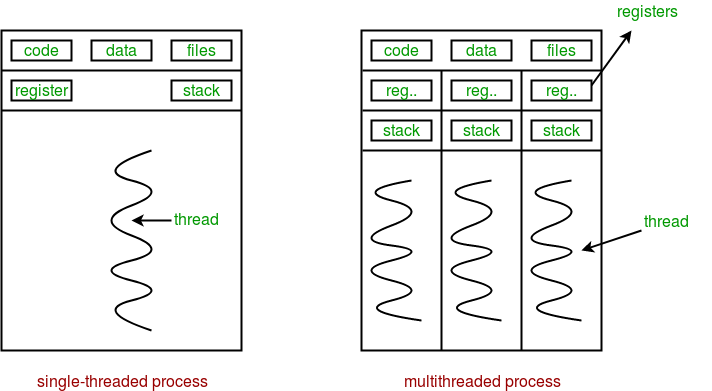

#### Multithreading: 
- It is defined as the ability of a processor to execute multiple threads concurrently.

## Multi-threading in Python

In [1]:
# Python program to illustrate the concept
# of threading
# importing the threading module
import threading #To import the threading module
 
 
def print_cube(num):
    # function to print cube of given num
    print("Cube: {}" .format(num * num * num))
 
 
def print_square(num):
    # function to print square of given num
    print("Square: {}" .format(num * num))
 
 
if __name__ =="__main__":
    # creating thread
    t1 = threading.Thread(target=print_square, args=(10,))  #create an object of Thread class
    t2 = threading.Thread(target=print_cube, args=(10,))    #create an object of Thread class
 
    # starting thread 1
    t1.start()
    # starting thread 2
    t2.start()
 
    # wait until thread 1 is completely executed
    t1.join()
    # wait until thread 2 is completely executed
    t2.join()
 
    # both threads completely executed
    print("Done!")

Square: 100
Cube: 1000
Done!


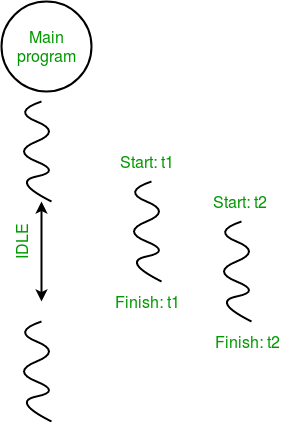

In [1]:

# Python program to illustrate the concept
# of threading
import threading
import os
 
def task1():
    print("Task 1 assigned to thread: {}".format(threading.current_thread().name))
    print("ID of process running task 1: {}".format(os.getpid()))
 
def task2():
    print("Task 2 assigned to thread: {}".format(threading.current_thread().name))
    print("ID of process running task 2: {}".format(os.getpid()))
 
if __name__ == "__main__":
 
    # print ID of current process
    print("ID of process running main program: {}".format(os.getpid()))
 
    # print name of main thread
    print("Main thread name: {}".format(threading.current_thread().name))
 
    # creating threads
    t1 = threading.Thread(target=task1, name='t1')
    t2 = threading.Thread(target=task2, name='t2') 
 
    # starting threads
    t1.start()
    t2.start()
 
    # wait until all threads finish
    t1.join()
    t2.join()

ID of process running main program: 12704
Main thread name: MainThread
Task 1 assigned to thread: t1
ID of process running task 1: 12704
Task 2 assigned to thread: t2
ID of process running task 2: 12704


# Explanation
Suppose we have a qua-core processor. Suppose all the 4 different processors run/execute 4 different programs.
- Concept of threading comes into picture when we want to execute program 1 multiple time in the same processor.Where in a single core the progrem will we executed by creating multiple threads and executing them parallely or one by one.
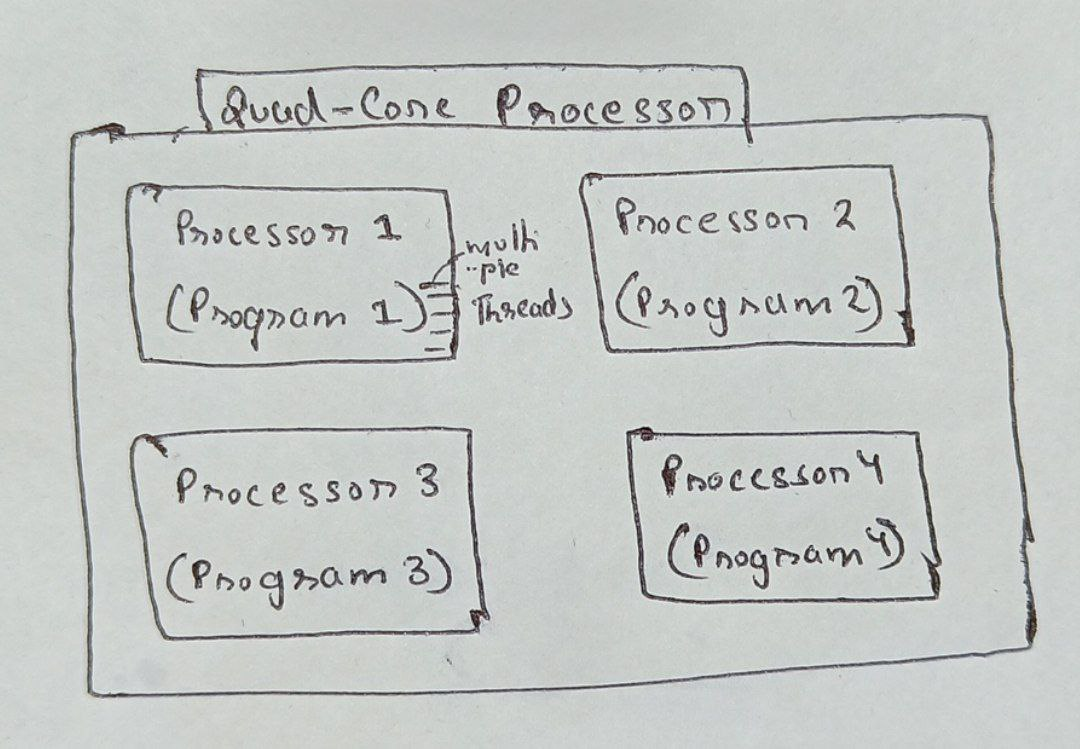

In [2]:
 import threading

In [15]:
def test(id):
    print("this is test id, %d " %id) 
    

In [16]:
test(10)

this is test id, 10 


In [17]:
test(0)

this is test id, 0 


In [18]:
test(1)

this is test id, 1 


In [24]:
#Creating multiple threads and storing them inside a thread variable
thread_variable = [threading.Thread(target=test,args=(i,)) for i in [10,0,3]] #what is the significance of ','?
thread_variable

[<Thread(Thread-13, initial)>,
 <Thread(Thread-14, initial)>,
 <Thread(Thread-15, initial)>]

In [25]:
#Executing all threads in a single core
for t in thread_variable:
    t.start()

this is test id, 10 
this is test id, 0 
this is test id, 3 


**Q)** Create a program to fetch data from the given links and store those data in a single file<br>
**Link1:** https://raw.githubusercontent.com/itsfoss/text-files/master/agatha.txt <br>
**Link2:** https://raw.githubusercontent.com/itsfoss/text-files/master/sherlock.txt <br>
**Link3:** https://raw.githubusercontent.com/itsfoss/text-files/master/sample_log_file.txt

In [29]:
#Fetching data from the link
import urllib.request 

def file_download(url,file_to_stroe_data):
    urllib.request.urlretrieve(url,file_to_stroe_data)
    
#instead of fetching data and store it one by one from above 3 links, we can create a thread.

#url list to store all the urls
url_lst = ["https://raw.githubusercontent.com/itsfoss/text-files/master/agatha.txt",
          "https://raw.githubusercontent.com/itsfoss/text-files/master/sherlock.txt",
          "https://raw.githubusercontent.com/itsfoss/text-files/master/sample_log_file.txt"]

#variable to store all the file names
filenames = ['data1.txt','data2.txt','data3.txt'] 

#creating threading variables to store all the thread in a list
threads = [threading.Thread(target=file_download, args=(url_lst[i],filenames[i]))for i in range(len(url_lst))]

#now Executing all the treads one by one
for t in threads:
    t.start()

**Q)** Create a function to calculate square of the nos given in a list. use threading method with sleep method

In [73]:
#function to do iteration
import time
def iterate_this(num):
    for i in range(5):
        print("iterate_this prints the value of num: %d and prints the value of i: %d" %(num,i))
        time.sleep(1)
for i in range(5):
    iterate_this(i)

iterate_this prints the value of num: 0 and prints the value of i: 0
iterate_this prints the value of num: 0 and prints the value of i: 1
iterate_this prints the value of num: 0 and prints the value of i: 2
iterate_this prints the value of num: 0 and prints the value of i: 3
iterate_this prints the value of num: 0 and prints the value of i: 4
iterate_this prints the value of num: 1 and prints the value of i: 0
iterate_this prints the value of num: 1 and prints the value of i: 1
iterate_this prints the value of num: 1 and prints the value of i: 2
iterate_this prints the value of num: 1 and prints the value of i: 3
iterate_this prints the value of num: 1 and prints the value of i: 4
iterate_this prints the value of num: 2 and prints the value of i: 0
iterate_this prints the value of num: 2 and prints the value of i: 1
iterate_this prints the value of num: 2 and prints the value of i: 2
iterate_this prints the value of num: 2 and prints the value of i: 3
iterate_this prints the value of n

In [60]:
#Using Multithreading for executing above function
import time
#defining a function 
def iterate_this(num):
    for i in range(10):
        print("iterate_this prints the value of num: %d and prints the value of i: %d" %(num,i))
        time.sleep(1)
#Creating list of Threads
threads=[threading.Thread(target=iterate_this,args=(i,))for i in range(10)]

#Executing Threads one by one:
def run_threads():
    for t in threads:
        t.start()
run_threads()

    
    
#Explanation:
#In the above program as the thread one waits for 1second multithreading executes thread2 hence not stopping the entire process and thus optimising the code

iterate_this prints the value of num: 0 and prints the value of i: 0
iterate_this prints the value of num: 1 and prints the value of i: 0
iterate_this prints the value of num: 2 and prints the value of i: 0
iterate_this prints the value of num: 3 and prints the value of i: 0
iterate_this prints the value of num: 4 and prints the value of i: 0
iterate_this prints the value of num: 5 and prints the value of i: 0
iterate_this prints the value of num: 6 and prints the value of i: 0
iterate_this prints the value of num: 7 and prints the value of i: 0
iterate_this prints the value of num: 8 and prints the value of i: 0
iterate_this prints the value of num: 9 and prints the value of i: 0
0.008980989456176758
iterate_this prints the value of num: 9 and prints the value of i: 1iterate_this prints the value of num: 6 and prints the value of i: 1
iterate_this prints the value of num: 5 and prints the value of i: 1
iterate_this prints the value of num: 4 and prints the value of i: 1
iterate_this p

**Q)** Creating a program for shared variable and Lock variable.

In [70]:
shared_var = 0 
lock_var = threading.Lock()
def test4(x) : 
    global shared_var
    with lock_var : 
        shared_var = shared_var + 1
        print("value of x %d and value of shareed_var %d " %(x, shared_var))
        time.sleep(1)
 
thread5  = [threading.Thread(target=test4 , args = (i,)) for i in [1,2,3,4,4,5]]
for t in thread5 : 
    t.start()

value of x 1 and value of shareed_var 1 
value of x 2 and value of shareed_var 2 
value of x 3 and value of shareed_var 3 
value of x 4 and value of shareed_var 4 
value of x 4 and value of shareed_var 5 
value of x 5 and value of shareed_var 6 


In [71]:
 help(type(threading.Lock()))

Help on class lock in module _thread:

class lock(builtins.object)
 |  A lock object is a synchronization primitive.  To create a lock,
 |  call threading.Lock().  Methods are:
 |  
 |  acquire() -- lock the lock, possibly blocking until it can be obtained
 |  release() -- unlock of the lock
 |  locked() -- test whether the lock is currently locked
 |  
 |  A lock is not owned by the thread that locked it; another thread may
 |  unlock it.  A thread attempting to lock a lock that it has already locked
 |  will block until another thread unlocks it.  Deadlocks may ensue.
 |  
 |  Methods defined here:
 |  
 |  __enter__(...)
 |      acquire(blocking=True, timeout=-1) -> bool
 |      (acquire_lock() is an obsolete synonym)
 |      
 |      Lock the lock.  Without argument, this blocks if the lock is already
 |      locked (even by the same thread), waiting for another thread to release
 |      the lock, and return True once the lock is acquired.
 |      With an argument, this will only b